In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.font_manager

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_install_location = [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_name = [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list]
print(f'font 설치 위치 : {font_install_location}', end='\n\n')
print(f'font 이름 : {font_name}')

font 설치 위치 : ['c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymReg.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymBol.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', 'c:\\Users\\dbswo\\anaconda3\\envs\\subs_predict\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\

In [4]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False


In [5]:
data_info = pd.read_csv("./data/data_info.csv", encoding="utf-8-sig")
data_info

가입기간 * 활동적인 학습 일수 / 가입 기간 * 30 = 가입 기간동안의 활동률

,column,description
0,user_id,사용자의 고유 식별자
1,subscription_duration,사용자가 서비스에 가입한 기간 (월)
2,recent_login_time,사용자가 마지막으로 로그인한 시간 (일)
3,average_login_time,사용자의 일반적인 로그인 시간
4,average_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)
5,monthly_active_learning_days,월간 활동적인 학습 일수
6,total_completed_courses,완료한 총 코스 수
7,recent_learning_achievement,최근 학습 성취도
8,abandoned_learning_sessions,중단된 학습 세션 수
9,community_engagement_level,커뮤니티 참여도


In [91]:
train = pd.read_csv("./data/train.csv", encoding="utf-8-sig")
test = pd.read_csv("./data/test.csv", encoding="utf-8-sig")
sample = pd.read_csv("./data/sample_submission.csv", encoding="utf-8-sig")

train.head(5)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [7]:
test.head(5)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,Low,Premium,2,7
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,Low,Basic,4,4
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,Low,Premium,1,3
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,High,Premium,1,5
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,Medium,Basic,1,3


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [10]:
train.select_dtypes(exclude='object').describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [92]:
test.select_dtypes(exclude='object').describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.055700,14.998000,15.026034,55.481839,12.454600,12.197800,75.029148,2.990700,3.905400,2.008100,3.498100
std,6.587635,8.364341,2.984562,56.901447,6.926567,3.647246,10.060532,1.724155,1.273504,1.406923,2.284364
min,1.000000,1.000000,4.304375,0.002851,1.000000,1.000000,39.224932,0.000000,1.000000,0.000000,0.000000
25%,6.000000,8.000000,13.023887,15.796562,6.000000,10.000000,68.297270,2.000000,3.000000,1.000000,2.000000
50%,12.000000,15.000000,15.031312,37.801621,12.000000,12.000000,74.942627,3.000000,4.000000,2.000000,3.000000
75%,18.000000,22.000000,17.051425,75.911356,19.000000,15.000000,81.853699,4.000000,5.000000,3.000000,5.000000
max,23.000000,29.000000,25.707977,606.510444,24.000000,28.000000,117.858556,11.000000,5.000000,10.000000,7.000000


1. average_time_per_learning_session에 평균대비 값이 너무 큰 이상치가 존재한다.
- 아마 강의를 켜놓고 끄지 않는다던가 특이 케이스에 속할 것으로 예상된다.

2. ?recent_learning_achievement 에 100%를 넘는 경우가 존재한다.
- 학습 성취도가 100을 넘길 수 있는 구조인가? 에 대해 알아볼 필요가 있다.

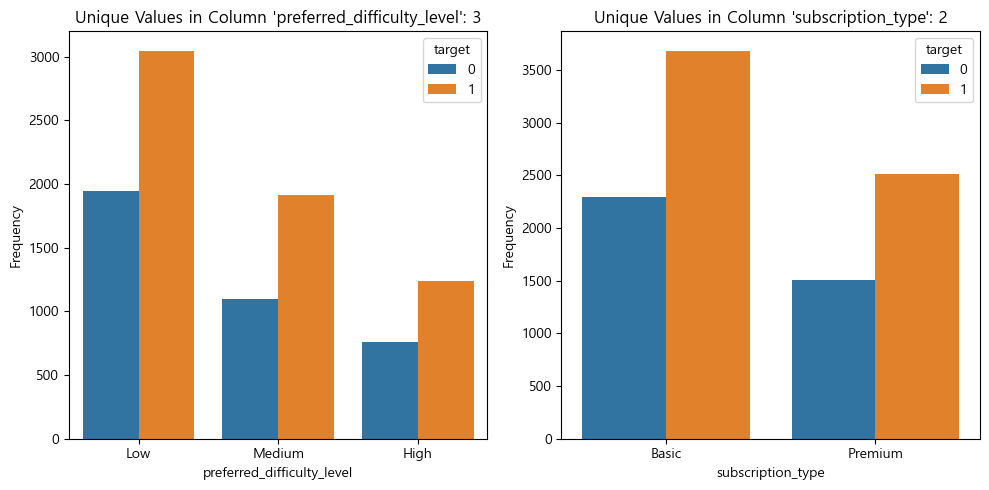

In [11]:
# object type 변수 시각화
def get_len(x):
    if len(x) % 2 == 0:
        return len(x) // 2
    else:
        return len(x) // 2 + 1

object_columns = train.select_dtypes('object').columns[1:]
fig, axes = plt.subplots(get_len(object_columns), 2, figsize=(10, 5))

for idx, i in enumerate(object_columns):
    unique_object_value_count = train[i].nunique()

    sns.countplot(x=i, data=train, hue='target', ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(f"Unique Values in Column '{i}': {unique_object_value_count}")
    axes.flatten()[idx].set_xlabel(i)
    axes.flatten()[idx].set_ylabel("Frequency")
plt.tight_layout()
plt.show()        

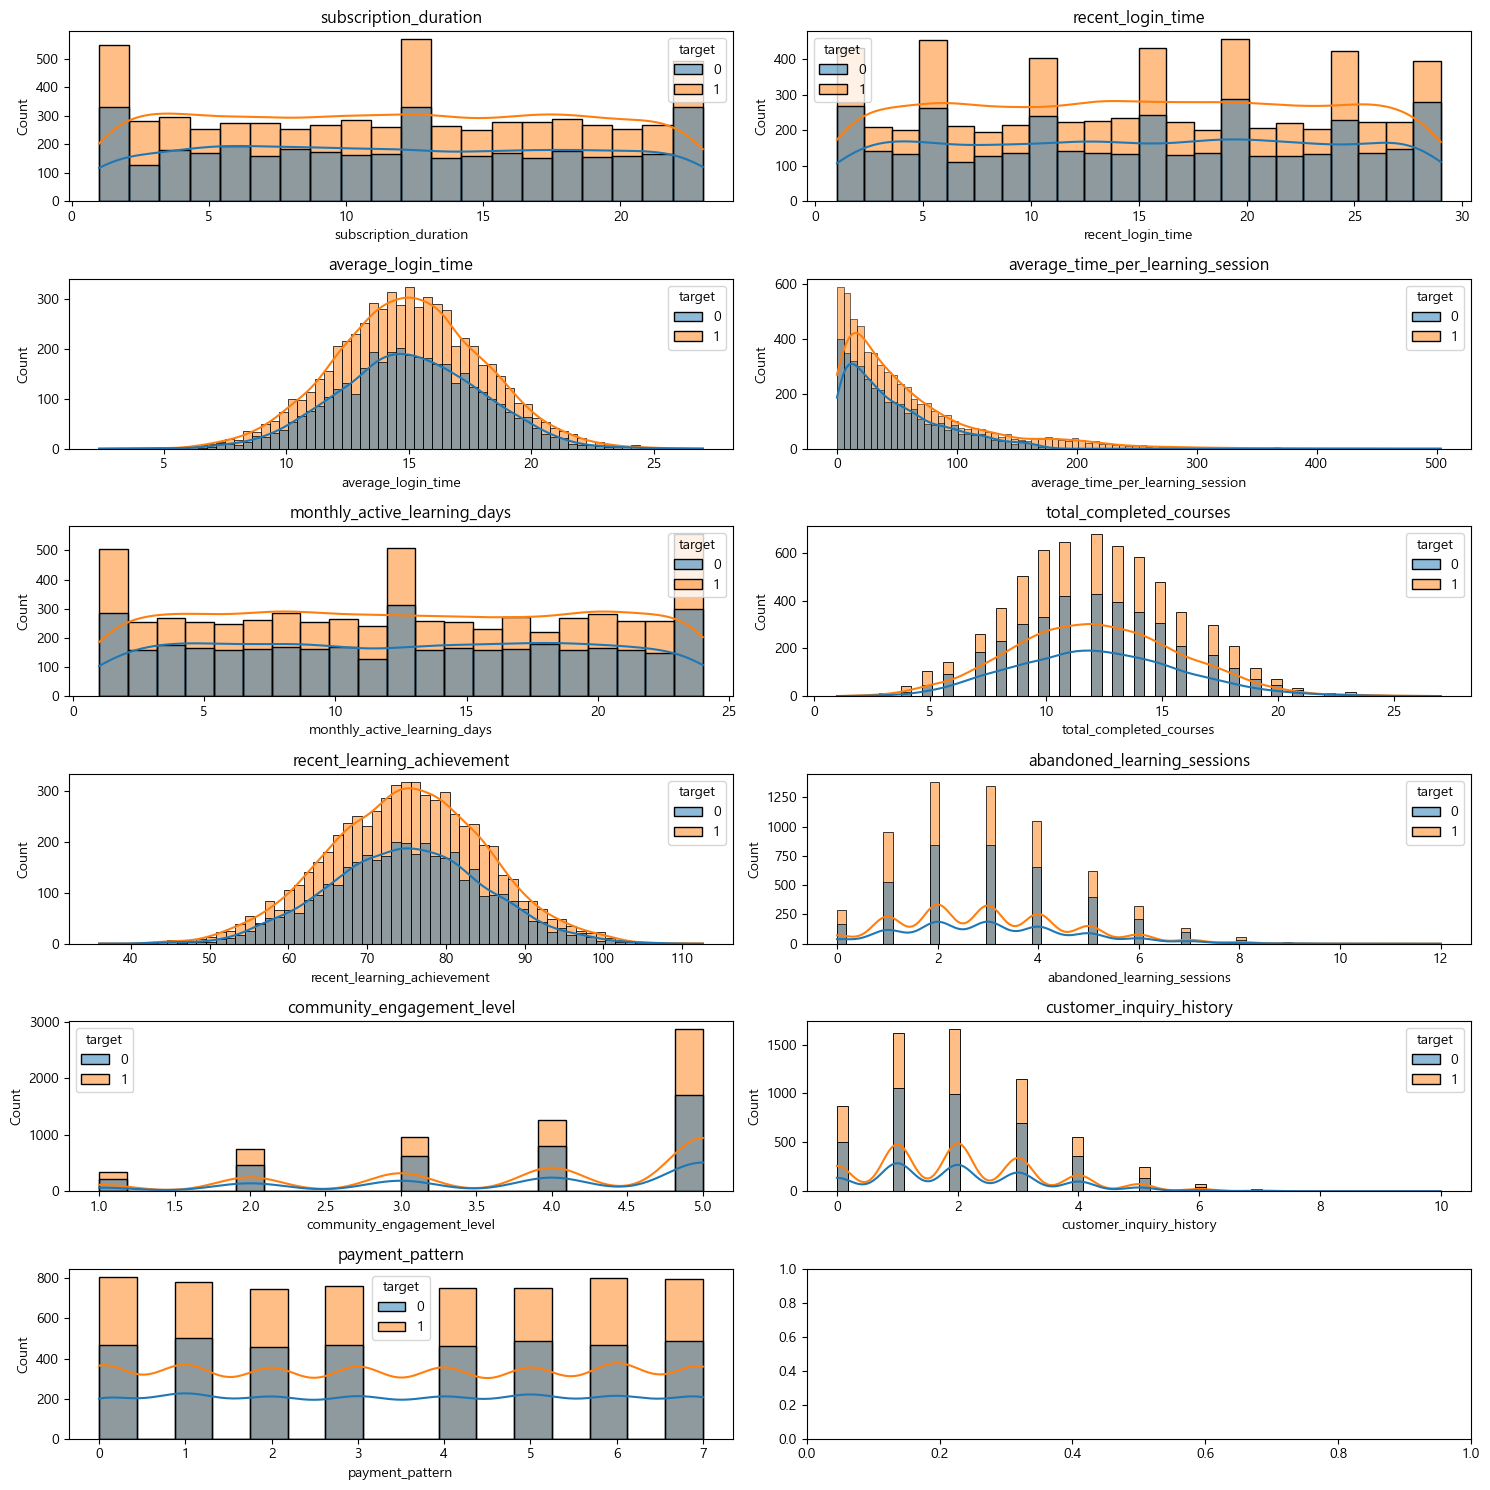

In [12]:
# 연속형 변수 히스토그램 시각화
def get_len(x):
    if len(x) % 2 == 0:
        return len(x) // 2
    else:
        return len(x) // 2 + 1

non_object_columns = train.select_dtypes(exclude='object').columns[:-1]
num_rows = get_len(non_object_columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 15))

for idx, col in enumerate(non_object_columns):
    sns.histplot(data=train, x=col, hue='target', ax=axes.flatten()[idx], kde=True)
    axes.flatten()[idx].set_title(col)
plt.tight_layout()
plt.show()


- average time per learning session을 약 180분 이후 값은 거의 모두 target값이 1인 것을 확인할 수 있다.

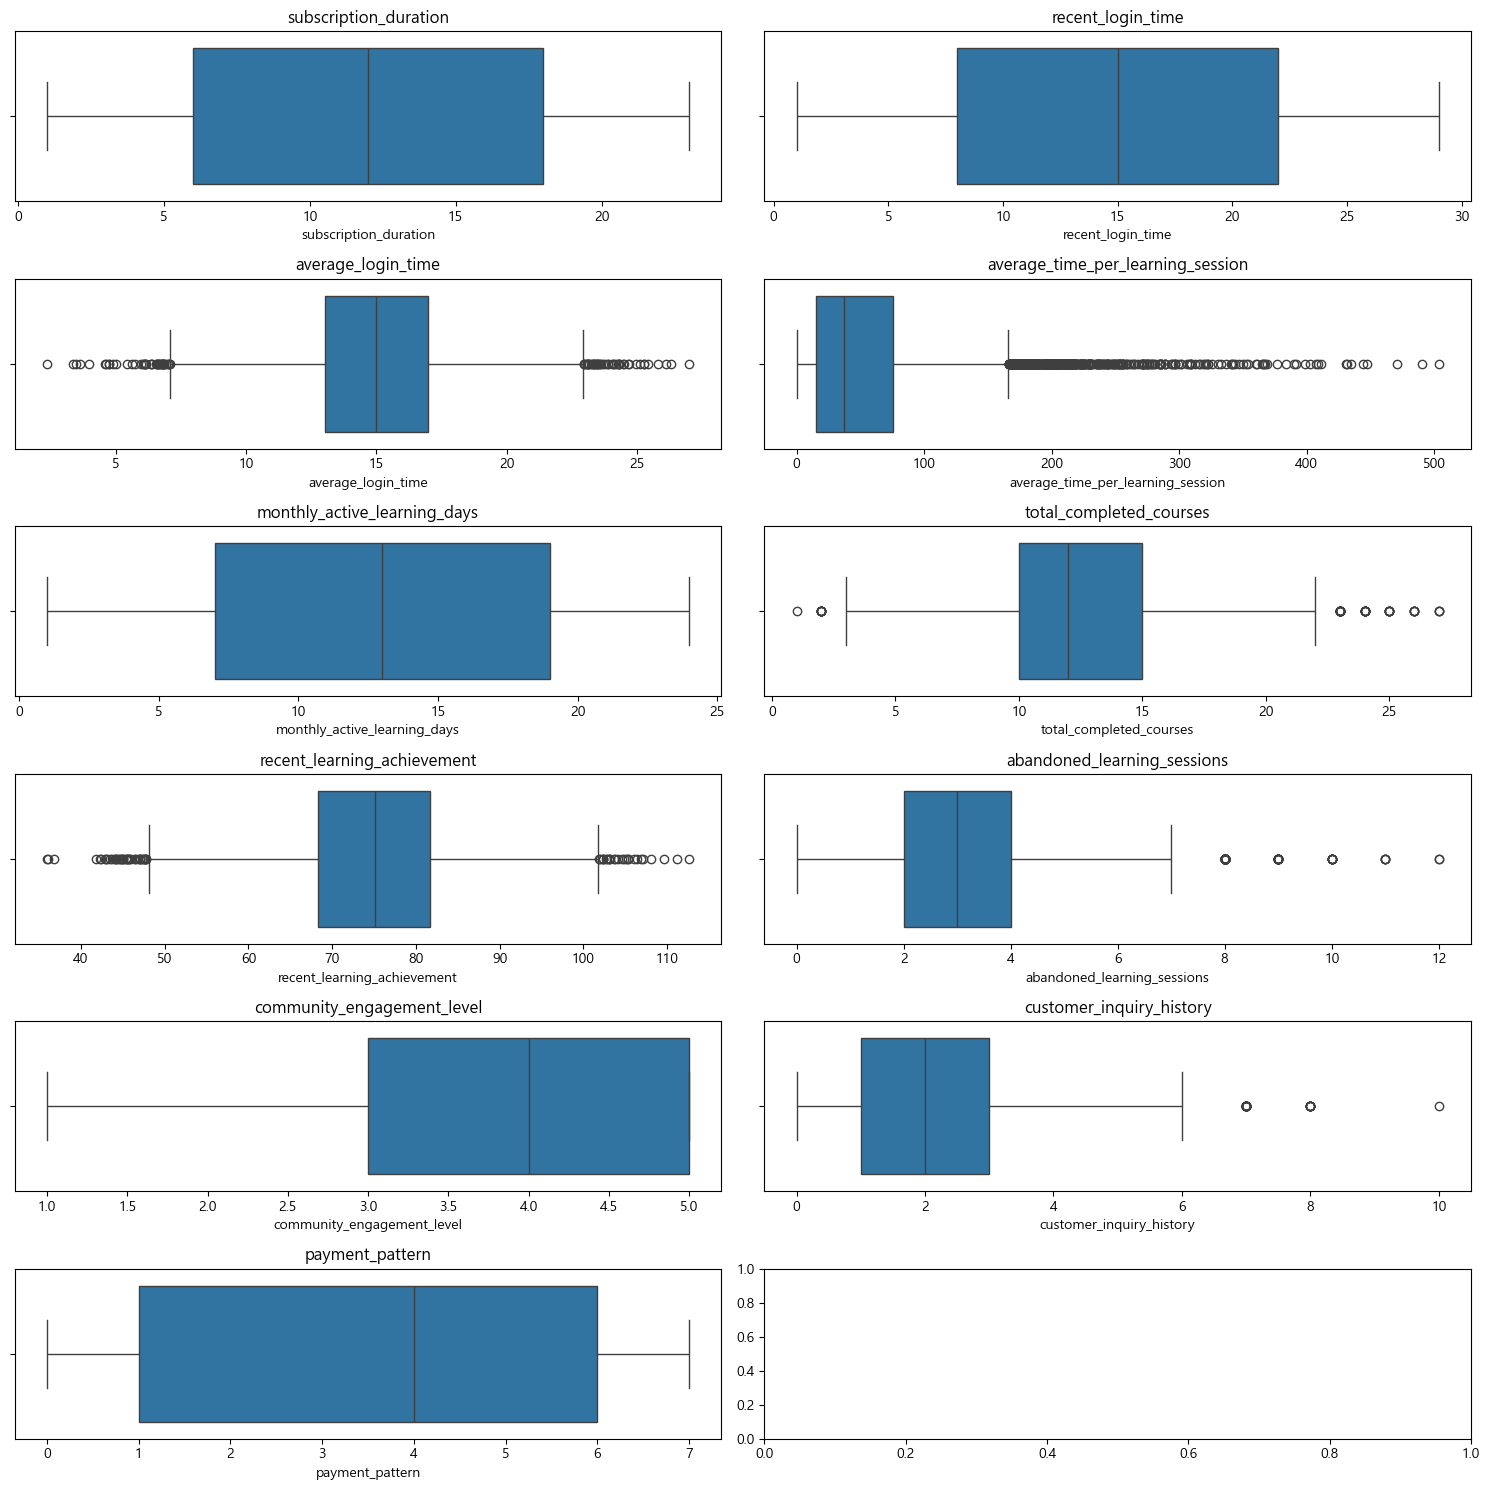

In [13]:
# 연속형 변수 boxplot 시각화
def get_len(x):
    if len(x) % 2 == 0:
        return len(x) // 2
    else:
        return len(x) // 2 + 1

non_object_columns = train.select_dtypes(exclude='object').columns[:-1]
num_rows = get_len(non_object_columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 15))

for idx, col in enumerate(non_object_columns):
    sns.boxplot(data=train, x=col, ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(col)
plt.tight_layout()
plt.show()


<Axes: >

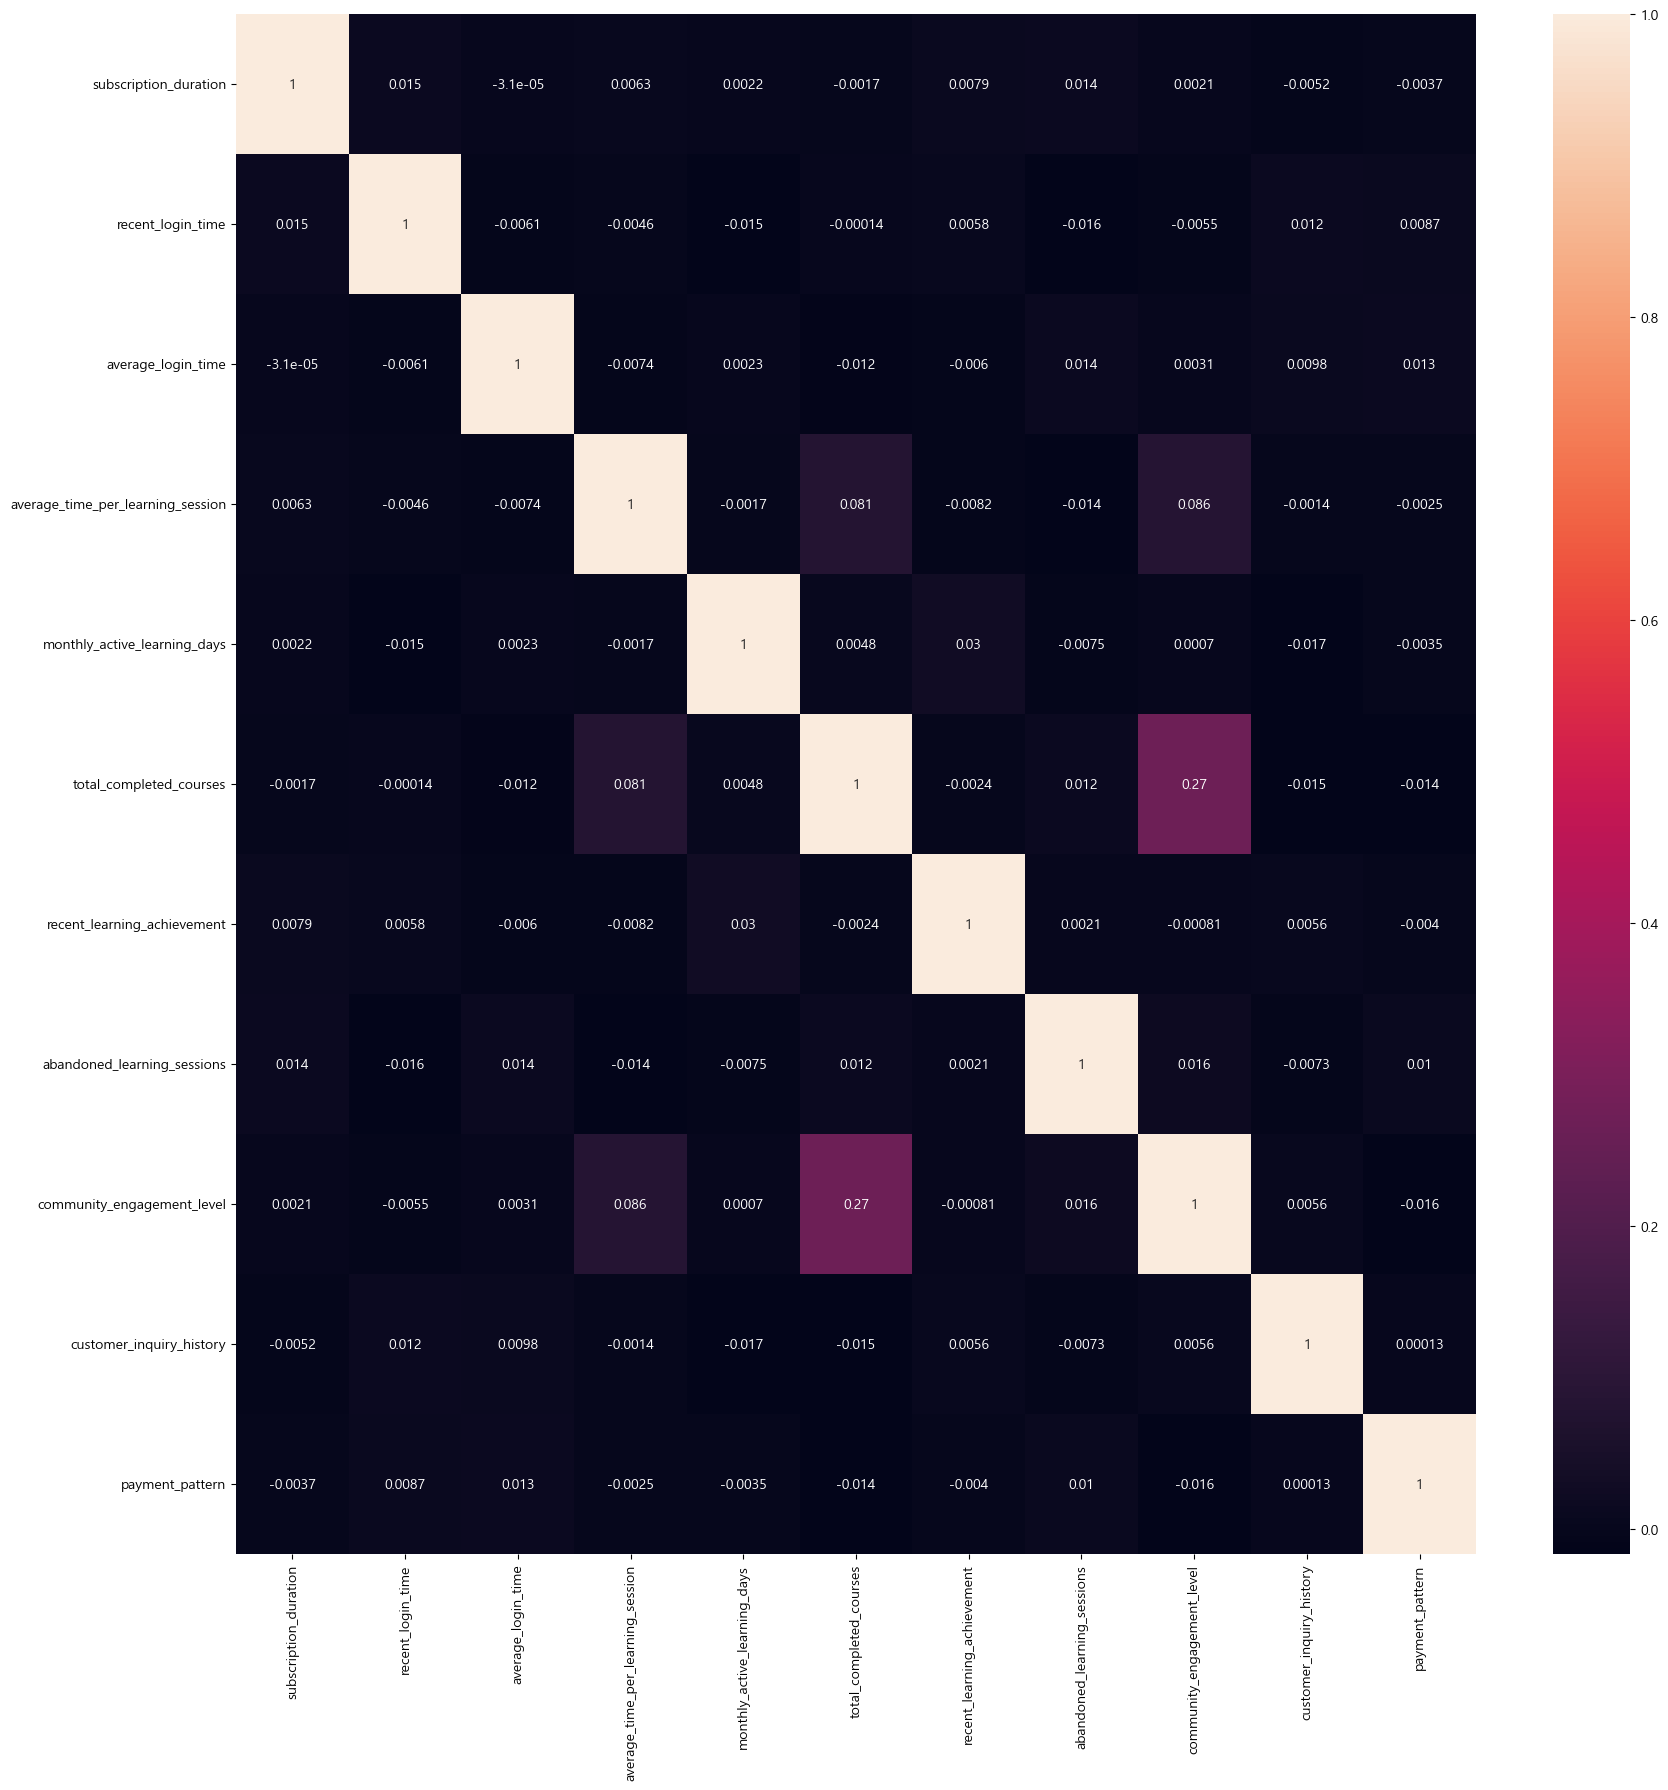

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(train[train.select_dtypes(exclude='object').columns[:-1]].corr(), annot=True)

- 커뮤니티 참여도와 총 완료 수를 제외하면 대부분 낮은 상관관계를 보인다.
- 커뮤니티 참여도와 총 완료 수 또한 낮은 양의 상관관계 정도이다.
- 이 상관관계를 통해 커뮤니티의 성격이 sns가 아니라 질의응답 게시판과 같은 형태가 아닐까라는 가정을 할 수 있다.

## 데이콘 기본코드 테스트

In [80]:
train = pd.read_csv("./data/train.csv", encoding="utf-8-sig")
test = pd.read_csv("./data/test.csv", encoding="utf-8-sig")
sample = pd.read_csv("./data/sample_submission.csv", encoding="utf-8-sig")

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 클러스터링할 열 선택 (여기서는 'average_time_per_learning_session'만 선택)
X = train[['average_time_per_learning_session']]
X_test = test[['average_time_per_learning_session']]

# 데이터 표준화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# KMeans 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=3)  # 클러스터 개수 설정
kmeans.fit(X_scaled)

# 클러스터링 결과를 데이터프레임에 추가
train['average_time_per_learning_session'] = kmeans.labels_
test['average_time_per_learning_session'] = kmeans.predict(X_test_scaled)

# 각 클러스터의 중심점 확인
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:", cluster_centers)

# 결과 출력
print(train)

Cluster Centers: [[ 23.41961837]
 [ 89.91958045]
 [205.62945751]]
       user_id  subscription_duration  recent_login_time  average_login_time  \
0     b919c29d                     13                 14           14.946163   
1     a0a60abb                     16                 18           18.453224   
2     b9f171ae                     22                  1           16.195228   
3     5dc0ba8b                      1                 19           17.628656   
4     65c83654                      4                  5           21.390656   
...        ...                    ...                ...                 ...   
9995  ae6b76bc                     22                 29           14.727623   
9996  24588752                     10                 11           19.374054   
9997  e4622a54                      7                 27           18.240978   
9998  e07fbad9                     11                  7           18.783800   
9999  e12dcb55                     10                 

In [85]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 수치형 및 범주형 변수 구분
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and col not in ['target']]
categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 수치형 데이터에 대해 스케일링 적용
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

# 전처리 후 학습 데이터 확인
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,0.167046,-0.121165,-0.015962,0,0.786885,1.038128,-0.669045,-0.024844,0.090246,1,0,1.400157,0.647774,0
1,a0a60abb,0.621553,0.357181,1.152389,1,0.498363,0.212579,2.261009,-0.594656,-0.702077,2,0,-0.711163,1.080460,1
2,b9f171ae,1.530566,-1.675788,0.400155,0,0.065581,0.487762,1.939124,-0.024844,0.090246,2,1,-1.414937,1.513146,1
3,5dc0ba8b,-1.650980,0.476767,0.877690,0,0.931145,1.588495,-0.489192,-1.734280,-0.702077,1,0,-0.711163,-1.515656,1
4,65c83654,-1.196473,-1.197443,2.130972,0,0.931145,-0.612970,0.691049,-0.594656,0.090246,2,0,0.696384,-1.515656,1


In [87]:
test.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,-0.438962,-0.001579,-1.272946,0,0.931145,0.762945,0.706764,-0.024844,0.882568,1,1,-0.007390,1.513146
1,0002c77d,-0.135958,-0.838683,-0.514866,0,-0.367201,1.038128,0.553422,0.544968,-1.494400,1,0,1.400157,0.215088
2,0002df5b,-0.135958,1.553045,1.184030,0,-0.511462,1.863678,-0.135689,1.114781,0.882568,1,1,-0.711163,-0.217598
3,000b6068,0.318548,0.237594,-0.536614,0,-0.078680,-1.713703,-1.175245,-1.734280,0.090246,0,1,-0.711163,0.647774
4,00184a0c,1.076059,-1.077856,-1.024218,0,-0.655723,0.762945,-1.919122,-1.164468,0.090246,2,0,-0.711163,-0.217598


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'target'])  # user_id는 제외하고 특성 데이터로 사용
y = train['target']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = XGBClassifier(random_state=42)
logistic_model.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = logistic_model.predict(X_val)
val_f1 = f1_score(y_val, val_predictions, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_val, val_predictions, zero_division=0))

# 테스트 데이터에 대한 예측 수행
test_X = test.drop(columns=['user_id'])  # user_id는 제외하고 특성 데이터로 사용
test_predictions = logistic_model.predict(test_X)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
submit_path = './baseline_submit(XGB_default_model_learningSession_clustering3).csv'
sample.to_csv(submit_path, index=False)

sample.head()

검증 데이터(Validation) Macro F1 성능 :  0.48977166122229837
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       758
           1       0.62      0.75      0.68      1242

    accuracy                           0.56      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.53      0.56      0.54      2000



,user_id,target
0,0001d6e9,1
1,0002c77d,0
2,0002df5b,0
3,000b6068,1
4,00184a0c,1


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'target'])  # user_id는 제외하고 특성 데이터로 사용
y = train['target']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = MLPClassifier(activation='relu', hidden_layer_sizes=50, solver='adam', 
                   alpha=0.001, max_iter=1000, learning_rate_init=0.001, random_state=42)
logistic_model.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = logistic_model.predict(X_val)
val_f1 = f1_score(y_val, val_predictions, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_val, val_predictions, zero_division=0))

# 테스트 데이터에 대한 예측 수행
test_X = test.drop(columns=['user_id'])  # user_id는 제외하고 특성 데이터로 사용
test_predictions = logistic_model.predict(test_X)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
submit_path = './baseline_submit(MLP_past_used_learningSession_clustering3).csv'
sample.to_csv(submit_path, index=False)

sample.head()

검증 데이터(Validation) Macro F1 성능 :  0.4890873015873015
              precision    recall  f1-score   support

           0       0.41      0.20      0.26       758
           1       0.63      0.83      0.71      1242

    accuracy                           0.59      2000
   macro avg       0.52      0.51      0.49      2000
weighted avg       0.54      0.59      0.54      2000



,user_id,target
0,0001d6e9,0
1,0002c77d,1
2,0002df5b,0
3,000b6068,1
4,00184a0c,1
